In [2]:
#Import Required Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [4]:
# Load and Preprocess the Data

# Load the dataset
df = pd.read_csv('../../data/processed/Imputed_Final_Merged_Canada_Dataset.csv')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# Remove commas from 'All industries GDP' and convert it to numeric
df['All industries GDP'] = df['All industries GDP'].replace({',': ''}, regex=True).astype(float)

# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Normalize the data (excluding the 'Date' column)
scaler = StandardScaler()
X = df.drop(columns=['Single_Family_Benchmark_SA', 'Townhouse_Benchmark_SA', 'Date'])
X_scaled = scaler.fit_transform(X)

# Prepare target variables
y_single_family = df['Single_Family_Benchmark_SA']
y_townhouse = df['Townhouse_Benchmark_SA']


In [5]:
# Split the Data into Training and Testing Sets
X_train_sf, X_test_sf, y_train_sf, y_test_sf = train_test_split(X_scaled, y_single_family, test_size=0.2, random_state=42)
X_train_th, X_test_th, y_train_th, y_test_th = train_test_split(X_scaled, y_townhouse, test_size=0.2, random_state=42)


In [6]:
# Build and Compile the Neural Network Model
def build_nn_model(input_shape):
    model = Sequential([
        Dense(64, input_dim=input_shape, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

# Build models for both Single Family and Townhouse predictions
nn_model_sf = build_nn_model(X_train_sf.shape[1])
nn_model_th = build_nn_model(X_train_th.shape[1])


c:\Users\dimam\miniconda3\envs\dsi_participant\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Train the Model

# Train the model for Single Family Benchmark SA
history_sf = nn_model_sf.fit(X_train_sf, y_train_sf, validation_data=(X_test_sf, y_test_sf), epochs=100, batch_size=16, verbose=1)

# Train the model for Townhouse Benchmark SA
history_th = nn_model_th.fit(X_train_th, y_train_th, validation_data=(X_test_th, y_test_th), epochs=100, batch_size=16, verbose=1)



Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 291975233536.0000 - mae: 508038.4062 - val_loss: 305871847424.0000 - val_mae: 521828.7812
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 263145701376.0000 - mae: 484455.2500 - val_loss: 305870438400.0000 - val_mae: 521827.6250
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 268250120192.0000 - mae: 487700.4688 - val_loss: 305868144640.0000 - val_mae: 521825.6875
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 296423686144.0000 - mae: 514398.6875 - val_loss: 305864146944.0000 - val_mae: 521822.4375
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 270824751104.0000 - mae: 492008.2188 - val_loss: 305857134592.0000 - val_mae: 521816.5938
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 270960132096.0000 - mae: 489663.6875 - val_loss: 305844486144.0000 - val_mae: 521806.2188
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 274601754624.0000 - mae: 497916.9375 - v

In [8]:
# Evaluate the model for Single Family
loss_sf, mae_sf = nn_model_sf.evaluate(X_test_sf, y_test_sf, verbose=0)
print(f'Single Family Benchmark SA - Mean Absolute Error: {mae_sf}')

# Evaluate the model for Townhouse
loss_th, mae_th = nn_model_th.evaluate(X_test_th, y_test_th, verbose=0)
print(f'Townhouse Benchmark SA - Mean Absolute Error: {mae_th}')


Single Family Benchmark SA - Mean Absolute Error: 168306.484375
Townhouse Benchmark SA - Mean Absolute Error: 126544.3515625


The Mean Absolute Error (MAE) values - 168,306 for Single Family Benchmark SA and 126,544 for Townhouse Benchmark SA — indicate the average absolute difference between your model's predictions and the actual values. 

Here's how to interpret and potentially improve these results:

**Interpretation:**

- **High MAE Values:** These MAE values suggest that, on average, the predictions are off by around $168,000 and $126,000 for the Single Family and Townhouse benchmarks, respectively. Depending on the typical range of house prices in your dataset, this may or may not be acceptable.

- **Complexity of the Problem:** House prices can be influenced by a wide range of factors, some of which might not be captured well by the model. Non-linear relationships, interactions between features, and external economic conditions can all affect the accuracy.

**Steps to Improve the Model:**

1. **Feature Engineering:**

    -  **Add More Relevant Features:** If you have access to additional data, such as neighborhood details, proximity to amenities, or historical price trends, including these could improve the model.

    - **Interaction Features:** Consider creating interaction terms (e.g., Interest Rate * Unemployment Rate) to capture more complex relationships.

2. **Hyperparameter Tuning:**
    - Experiment with different neural network architectures, such as varying the number of layers, neurons per layer, and activation functions.

    - Adjust the learning rate, batch size, and number of epochs to see if these changes reduce the MAE.

3. **Regularization:**

    - **Dropout Layers:** Introduce dropout layers in the neural network to prevent overfitting.
    - **L1/L2 Regularization:** Add regularization to the dense layers to penalize large weights and potentially improve generalization.

4. **Model Complexity:**

    - **Deepen the Network:** Increase the number of layers or neurons per layer to allow the model to learn more complex patterns.

    - **Ensemble Methods:** Consider using an ensemble of models, such as combining neural networks with other non-linear models like Random Forest or Gradient Boosting, to improve predictions.

5. **Cross-Validation:**
    - Use cross-validation to ensure that the model is not overfitting to a particular train-test split. This can provide a more reliable estimate of model performance.

6. **Data Augmentation:**
    
    - **Increase the Dataset Size:** If possible, gather more data to train the model better. More data can help the model generalize better and reduce error.




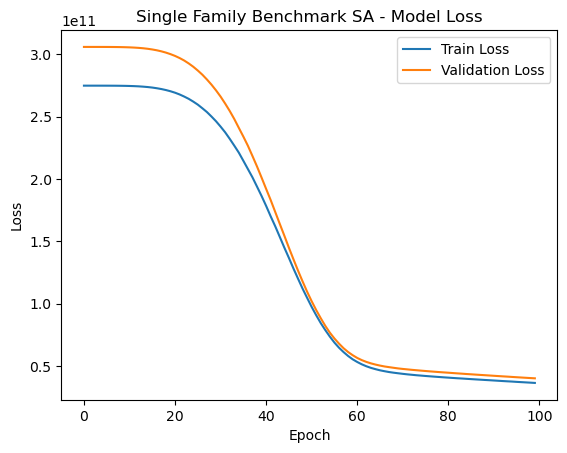

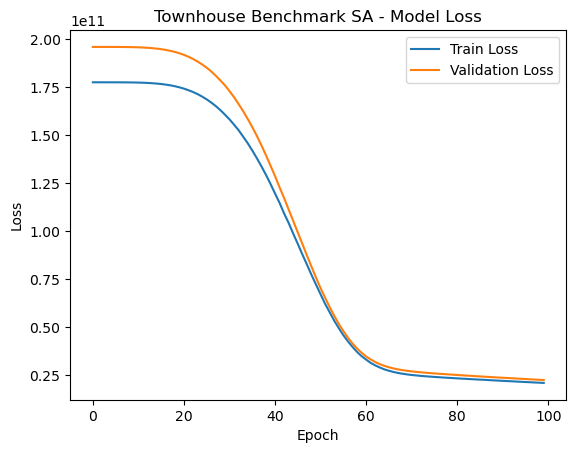

In [9]:
# Plotting the training history for Single Family
plt.plot(history_sf.history['loss'], label='Train Loss')
plt.plot(history_sf.history['val_loss'], label='Validation Loss')
plt.title('Single Family Benchmark SA - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training history for Townhouse
plt.plot(history_th.history['loss'], label='Train Loss')
plt.plot(history_th.history['val_loss'], label='Validation Loss')
plt.title('Townhouse Benchmark SA - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
# Predict on the test set for Single Family
y_pred_sf = nn_model_sf.predict(X_test_sf)

# Predict on the test set for Townhouse
y_pred_th = nn_model_th.predict(X_test_th)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


In [12]:
# Save the model in the newer Keras format
nn_model_sf.save('single_family_nn_model.keras')
nn_model_th.save('townhouse_nn_model.keras')
